### Slade Brooks
##### brooksl@mail.uc.edu
##### 03.24.2023
# AeroComputing Assignment 8

This code does FFTs on data and functions.

In [212]:
# import stuff
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [213]:
# define y fxn
def y(x): return 2*np.sin((2*np.pi*x)/7) - 4*np.sin((3*np.pi*x)/5)

# N data pts
N = 500

## Part A

In [214]:
# choose good range
xlow = 0
xhigh = 70

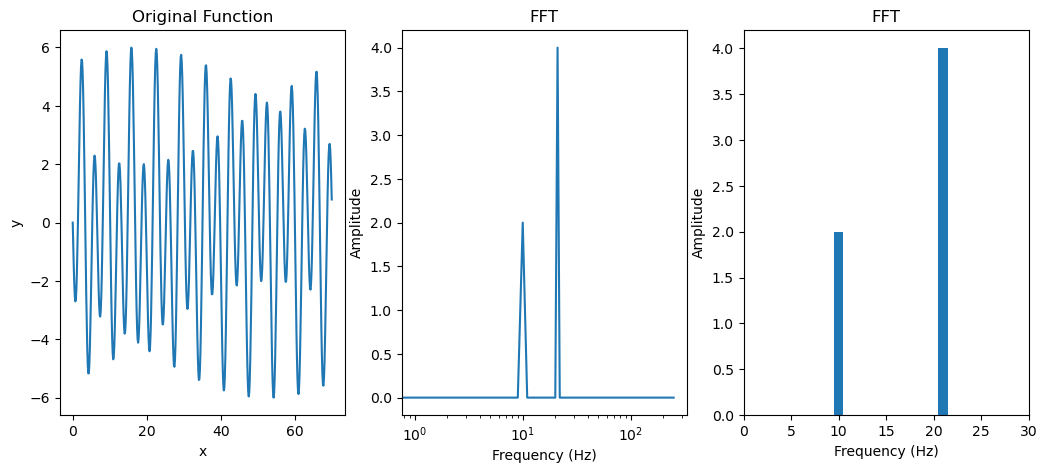

In [215]:
# run fft on it
x = np.linspace(xlow, xhigh, N, endpoint=False)
T = 1/N         # sample spacing
amp = abs(np.fft.fft(y(x)))[:N//2]
freq = np.fft.fftfreq(N, T)[:N//2]

# set up subplots
fig, ax = plt.subplots(1, 3)
fig.set_size_inches([12.5, 5])

# plot fft results
ax[1].semilogx(freq, 2*amp/N)
ax[2].bar(freq, 2*amp/N, width=1)

# plot actual fxn
ax[0].plot(x, y(x))

# plot formatting
ax[0].set_title("Original Function")
ax[1].set_title("FFT")
ax[2].set_title("FFT")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude")
ax[2].set_xlim(0, 30)
ax[2].set_xlabel("Frequency (Hz)")
ax[2].set_ylabel("Amplitude")
plt.show()

## Part B

In [216]:
# choose a bad range
xhigh = 31

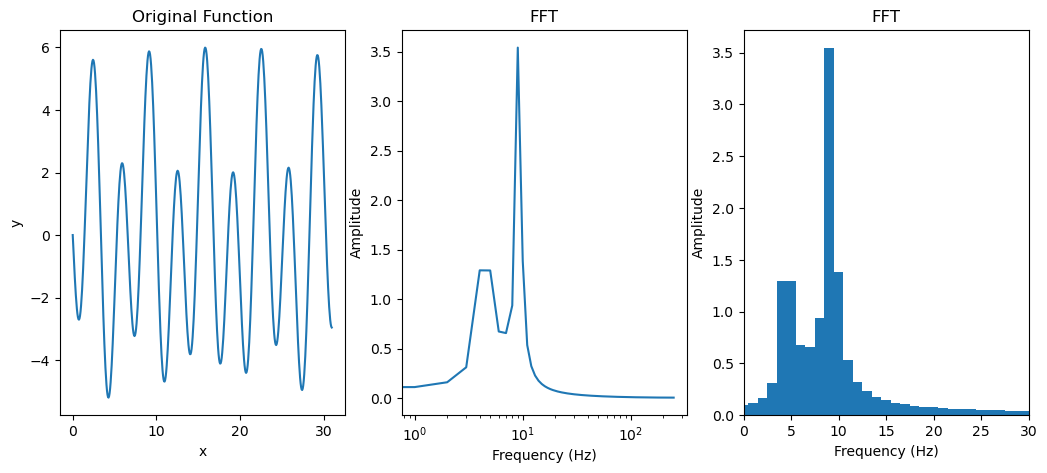

In [217]:
# run fft on it
x = np.linspace(xlow, xhigh, N, endpoint=False)
T = 1/N         # sample spacing
amp = abs(np.fft.fft(y(x)))[:N//2]
freq = np.fft.fftfreq(N, T)[:N//2]

# set up subplots
fig, ax = plt.subplots(1, 3)
fig.set_size_inches([12.5, 5])

# plot fft results
ax[1].semilogx(freq, 2*amp/N)
ax[2].bar(freq, 2*amp/N, width=1)

# plot actual fxn
ax[0].plot(x, y(x))

# plot formatting
ax[0].set_title("Original Function")
ax[1].set_title("FFT")
ax[2].set_title("FFT")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude")
ax[2].set_xlim(0, 30)
ax[2].set_xlabel("Frequency (Hz)")
ax[2].set_ylabel("Amplitude")
plt.show()

# Part 2

In [218]:
# read in data
data1 = np.genfromtxt("CupData1.dat", delimiter=",")[:,0]
data2 = np.genfromtxt("CupData2.dat", delimiter=",")[:,0]
data3 = np.genfromtxt("CupData3.dat", delimiter=",")[:,0]

In [219]:
# define stuff for FFT
N = 1024000         # data pts
T = 5/N         # time between each data point

## Part A

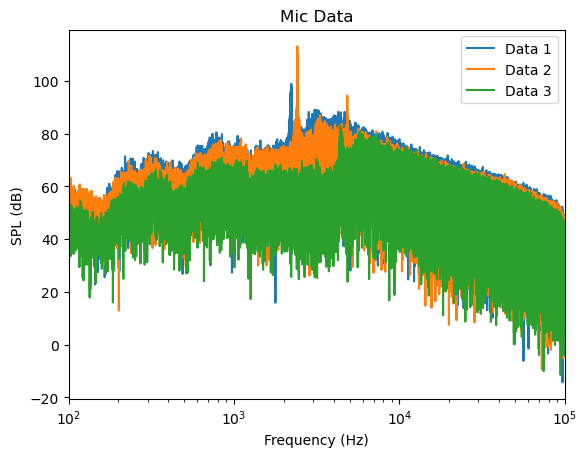

In [220]:
# take ffts of data
fft1 = np.fft.fft(data1)[:N//2]
fft2 = np.fft.fft(data2)[:N//2]
fft3 = np.fft.fft(data3)[:N//2]

# convert to SPL
spl1 = 20*np.log10((2*np.abs(fft1)/N)/(2*(10**-5)))
spl2 = 20*np.log10((2*np.abs(fft2)/N)/(2*(10**-5)))
spl3 = 20*np.log10((2*np.abs(fft3)/N)/(2*(10**-5)))

# get freqs
freqs = np.fft.fftfreq(N, T)[:N//2]

# plot them
plt.semilogx(freqs, spl1, label="Data 1")
plt.semilogx(freqs, spl2, label="Data 2")
plt.semilogx(freqs, spl3, label="Data 3")
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.title("Mic Data")
plt.xlim([10**2, 10**5])
plt.legend()
plt.show()

## Part B

In [221]:
# set up stuff for fft
buckets = 250
N = 1024000
n = 1024000//buckets
T = 5/(250*N)

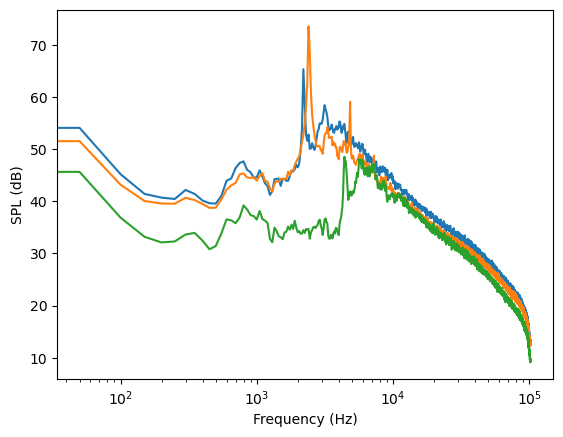

In [222]:
# do ffts on each bin

# arrays for vals
fft1 = np.empty([buckets, n])
fft2 = np.empty([buckets, n])
fft3 = np.empty([buckets, n])
rms1 = np.empty(N)
rms2 = np.empty(N)
rms3 = np.empty(N)

# take fft of every bin
for i in range(0, N, n):
    buck = i//n
    fft1[buck] = 2/N*np.abs(np.fft.fft(data1[i:(i+n)]))
    fft2[buck] = 2/N*np.abs(np.fft.fft(data2[i:(i+n)]))
    fft3[buck] = 2/N*np.abs(np.fft.fft(data3[i:(i+n)]))

# rms of each bucket
for i in range(n):
    rms1[i] = np.sqrt(np.sum(fft1[:,i]**2)/buckets)
    rms2[i] = np.sqrt(np.sum(fft2[:,i]**2)/buckets)
    rms3[i] = np.sqrt(np.sum(fft3[:,i]**2)/buckets)

# convert ffts to SPL
spl1 = 20*np.log10(rms1[:n//2]/(2*(10**-5)))
spl2 = 20*np.log10(rms2[:n//2]/(2*(10**-5)))
spl3 = 20*np.log10(rms3[:n//2]/(2*(10**-5)))

# get freqs
freqs = np.fft.fftfreq(N, T)[:n//2]

plt.semilogx(freqs, spl1, label="Data 1")
plt.semilogx(freqs, spl2, label="Data 2")
plt.semilogx(freqs, spl3, label="Data 3")
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.show()